In [9]:
# 스팸 메일 분류 (이항분류) : LSTM : many-to-one
import pandas as pd

data = pd.read_csv('https://raw.githubusercontent.com/pykwon/python/master/testdata_utf8/spam.csv', encoding='latin1')
print(data.head(3))

del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']
print(data.head(3))

data['v1'] = data['v1'].replace(['ham','spam'], [0,1]) # ham을 0, spam을 1로 바꾸기
print(data.head(3))
print(data.info())
print(data.isnull().values.any())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
     v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
   v1                                                 v2
0   0  Go until jurong point, crazy.. Available only ...
1   0                      Ok lar... Joking wif u oni...
2   1  Free entry in 2 a wkly comp to win FA Cup fina...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtyp

In [22]:
print(data['v2'].nunique()) # nunique:개수반환, unique:고유값반환  # 전체 5572 중 5169만 유니크하다. -> 중복 데이터가 있다.

# 중복 메일 제거

data.drop_duplicates(subset=['v2'], inplace=True)
print('행 수 : ', len(data))
print(data['v1'].value_counts()) # 0(햄) : 4516  |   1(스팸) : 653
print(data.groupby('v1').size().reset_index(name='count'))

x_data = data['v2']  # 메일 내용 : feature
y_data = data['v1']  # 메일 구분 : label

# feature에 대한 토큰 처리
from keras.preprocessing.text import Tokenizer
tok = Tokenizer()  # char_level=False:단어(기본)  char_level=True:글자
tok.fit_on_texts(x_data)
sequences = tok.texts_to_sequences(x_data)
print(sequences[:3])

word_to_index = tok.word_index
print(word_to_index) # {'i': 1, 'to': 2, 'you': 3, ...
print(x_data[:1])    # Go until jurong point, crazy.. Available only ...

vocab_size = len(word_to_index) + 1  # 패딩을 위한 토큰이 0번 단어를 고려해 +1을 해서 저장함
print('vocab_size : ',vocab_size)    # 8921

x_data = sequences # [[47, 433, 4013, 780, 705, 662, 64 ...
print('max len : ', max(len(i) for i in x_data))  # 189
print('avg len : ', (sum(map(len, x_data)) / len(x_data))) # 15.610369510543626


5169
행 수 :  5169
0    4516
1     653
Name: v1, dtype: int64
   v1  count
0   0   4516
1   1    653
[[47, 433, 4013, 780, 705, 662, 64, 8, 1202, 94, 121, 434, 1203, 142, 2712, 1204, 68, 57, 4014, 137], [49, 306, 1364, 435, 6, 1767], [53, 537, 8, 20, 4, 1016, 934, 2, 220, 2713, 1365, 706, 2714, 2715, 267, 2716, 70, 2713, 2, 2717, 2, 359, 537, 604, 1205, 82, 436, 185, 707, 437, 4015]]
{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'have': 16, 'call': 17, 'that': 18, 'on': 19, '2': 20, 'are': 21, 'now': 22, 'so': 23, 'but': 24, 'not': 25, 'can': 26, 'at': 27, 'or': 28, "i'm": 29, 'do': 30, 'be': 31, 'get': 32, 'will': 33, 'just': 34, 'if': 35, 'with': 36, 'we': 37, 'no': 38, 'this': 39, 'ur': 40, 'up': 41, 'gt': 42, 'lt': 43, '4': 44, 'how': 45, 'when': 46, 'go': 47, 'from': 48, 'ok': 49, 'out': 50, 'all': 51, 'what': 52, 'free': 53, 'know': 54, 'like': 55, 'then': 56, 'got': 57, 'good': 58, '

In [27]:
from keras.utils import pad_sequences
max_len = max(len(i) for i in x_data)
data = pad_sequences(x_data, maxlen=max_len)
print(data[:1])

# train, test split
n_of_train = int(len(sequences) * 0.8)
n_of_test = int(len(sequences) - n_of_train)
print('n_of_train : ', n_of_train) # 4135
print('n_of_test : ', n_of_test)   # 1034        전체행 수 5169 = 4135 + 1034

import numpy as np
x_train = data[:n_of_train]
y_train = np.array(y_data[:n_of_train])
x_test = data[n_of_train:]
y_test = np.array(y_data[n_of_train:])
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)  # (4135, 189) (4135,) (1034, 189) (1034,)
print(x_train[:2])
print(y_train[:2])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0   47  433 4013  780  705  662   64    8 1202   94  121  434 1203
   142 2712 1204   68   57 4014  137]]
n_of_train :  4135
n_of_t

In [29]:
# model : LSTM + Dense
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Embedding

model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(LSTM(units=32, activation='tanh'))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(units=1, activation='sigmoid'))

print(model.summary())

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x=x_train, y=y_train, batch_size=32, epochs=5, validation_split=0.2, verbose=2)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          285472    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 294881 (1.12 MB)
Trainable params: 294881 (1.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
104

33/33 [==============================] - 1s 26ms/step - loss: 0.0524 - acc: 0.9874
test로 검증된 분류 정확도 : 0.987


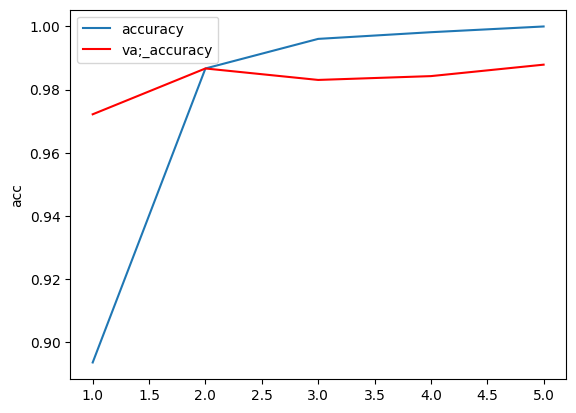

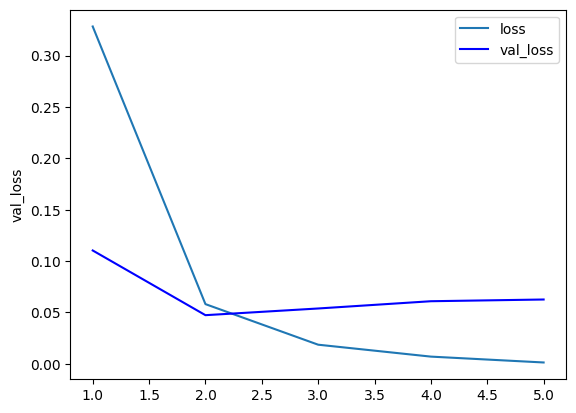

1/1 [==============================] - 0s 45ms/step
예측값 :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
실제값 :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]


In [34]:
print('test로 검증된 분류 정확도 : %.3f'%(model.evaluate(x_test, y_test)[1]))

# 시각화
import matplotlib.pyplot as plt
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'], label='accuracy')
plt.plot(epochs, history.history['val_acc'], label='va;_accuracy', color='r')
plt.ylabel('acc')
plt.legend()
plt.show()

plt.plot(epochs, history.history['loss'], label='loss')
plt.plot(epochs, history.history['val_loss'], label='val_loss', color='b')
plt.ylabel('val_loss')
plt.legend()
plt.show()

# pred
pred = model.predict(x_test[:20])
print('예측값 : ', np.where(pred>0.5, 1, 0).flatten())
print('실제값 : ', y_test[:20])